In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("F:\\avocado.csv")
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


data set is loaded

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU( Product Lookup codes ) 4046 sold

4225 - Total number of avocados with PLU( Product Lookup codes ) 4225 sold

4770 - Total number of avocados with PLU( Product Lookup codes ) 4770 sold

In [3]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

date,region,type are object datatype. year is integer datatype but it is categorical data.Remaining all are float data type

In [4]:
df.shape

(18249, 14)

this data set has 18249 rows and 14 columns

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df_new=df.drop('Unnamed: 0',axis=1)

unnamed 0 feature having index value which is already available in dataframe so I'm removing it

In [7]:
df_new.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Changing coloumns name for easy access

In [8]:
df_new.columns = ['Date','AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags','type','year','region']

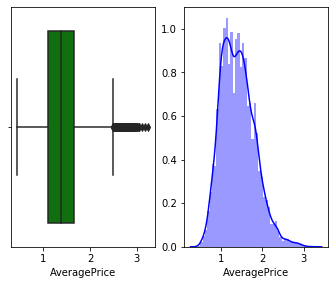

In [9]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df['AveragePrice'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['AveragePrice'],color='blue')

average price feature has outliers.The data distribution of this feature is normal

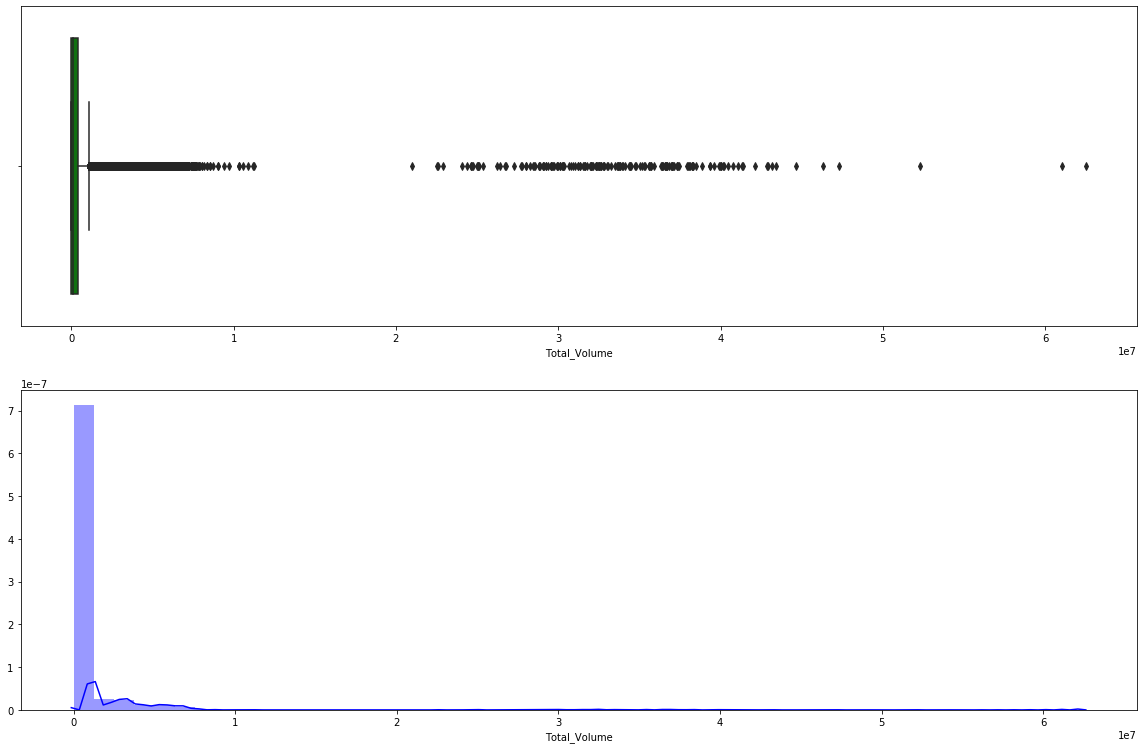

In [10]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['Total_Volume'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['Total_Volume'],color='blue')

The total volume feature has outliers.The data distribution of this feature is positively skewed

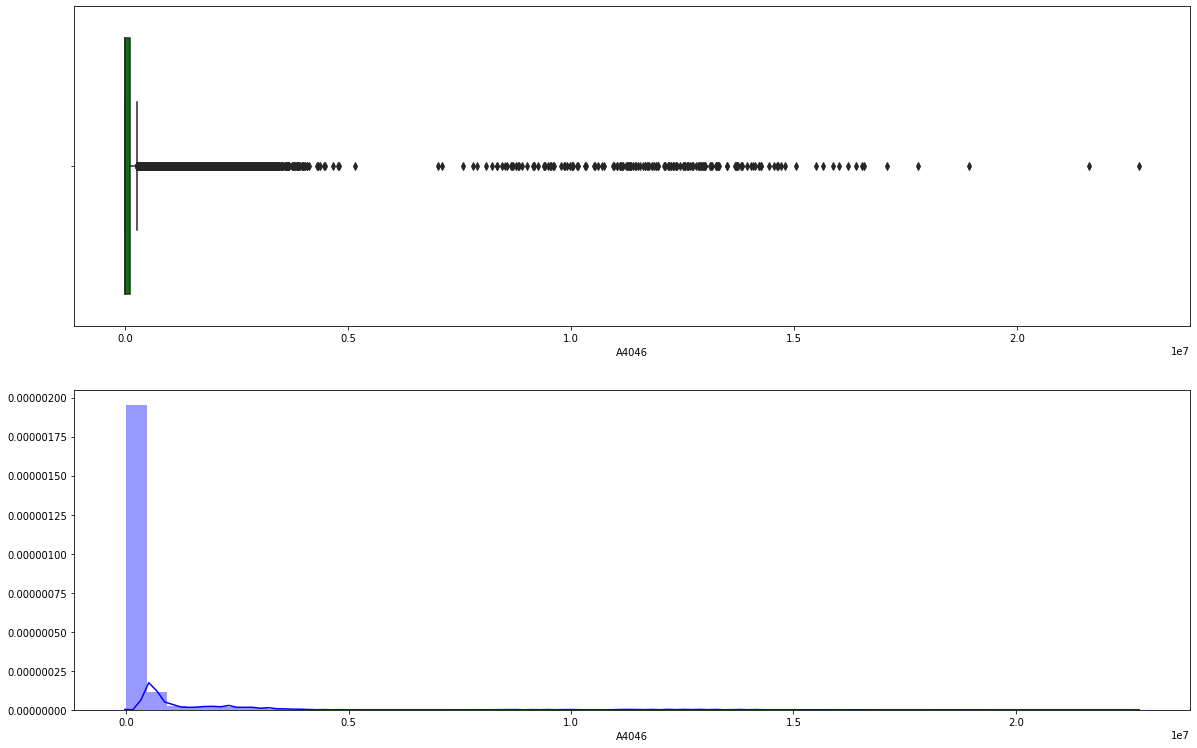

In [11]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['A4046'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['A4046'],color='blue')

The A4046 feature has outliers.The data distribution of this feature is positively skewed

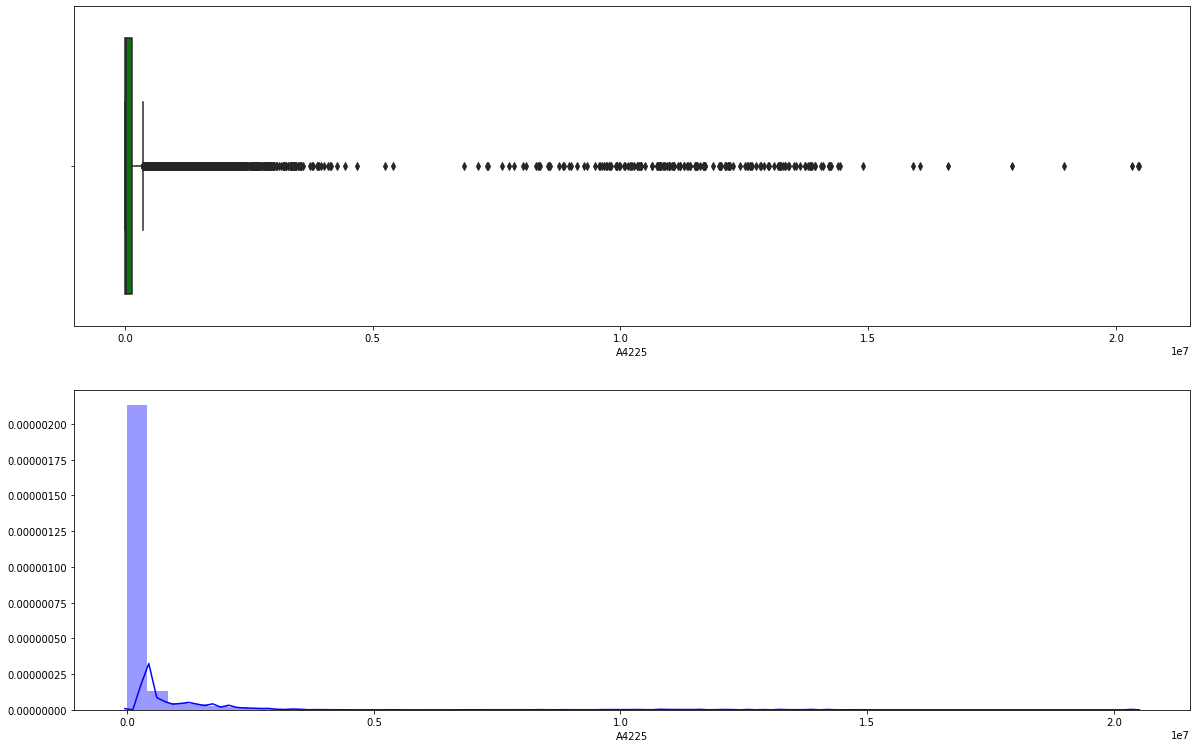

In [12]:
plt.figure(figsize=(20,20))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['A4225'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['A4225'],color='blue')

The 4225 feature has outliers.The data distribution of this feature is positively skewed

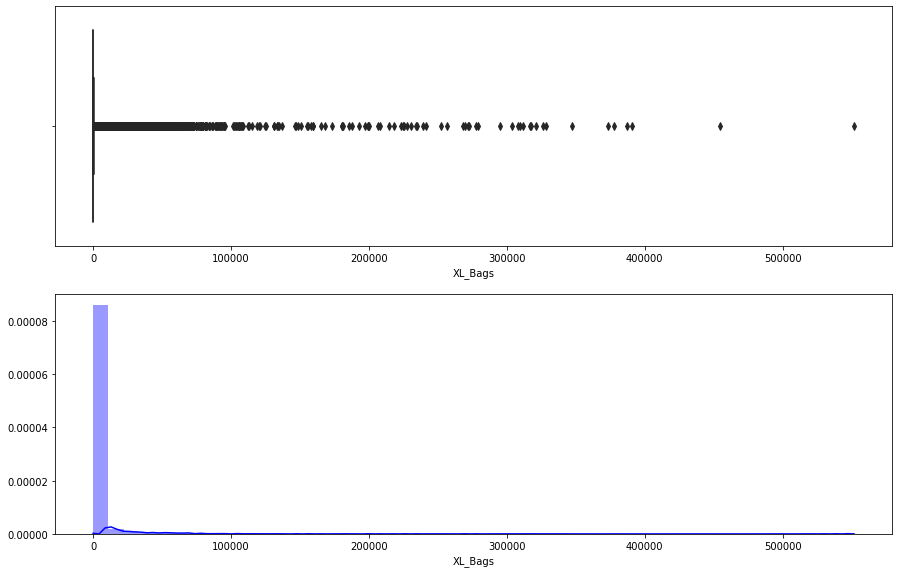

In [13]:
plt.figure(figsize=(15,15))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.boxplot(df_new['XL_Bags'],color='green')

i += 1
plt.subplot(rows,cols,i)
sns.distplot(df_new['XL_Bags'],color='blue')

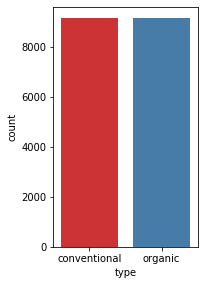

In [14]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df_new.type,palette="Set1")

data feature type is normally distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text xticklabel objects>)

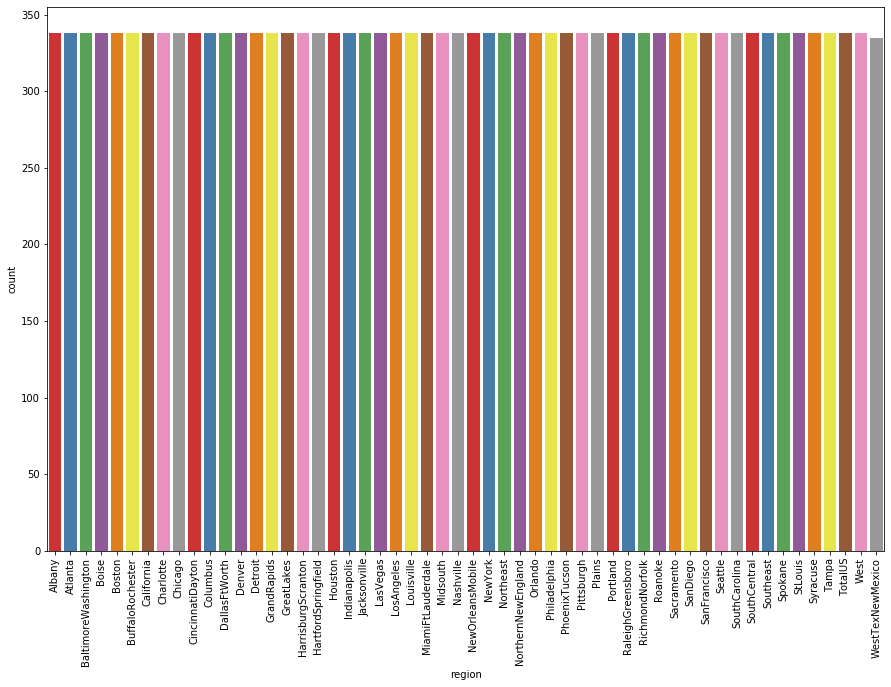

In [15]:
plt.figure(figsize=(15,10))
rows=1
cols=1
i=0
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['region'].unique()) 
sns.countplot(df_new["region"],palette="Set1")
plt.xticks(rotation=90)

Except WestTexNewMexico all region has equal number of sales

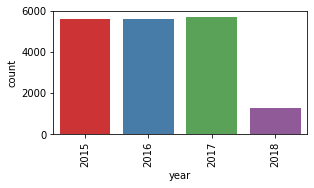

In [16]:
plt.figure(figsize=(10,5))
rows=2
cols=2
i=0
i+=1
plt.subplot(rows,cols,i)
l = list(df_new['year'].unique()) 
sns.countplot(df_new["year"],palette="Set1")
plt.xticks(rotation=90)
plt.grid=True

sales in the year 2015 and 2016 are same .the year 2018 has less sales compare to other years.the year 2017 has high sales

MULTIVARIATE ANALYSIS

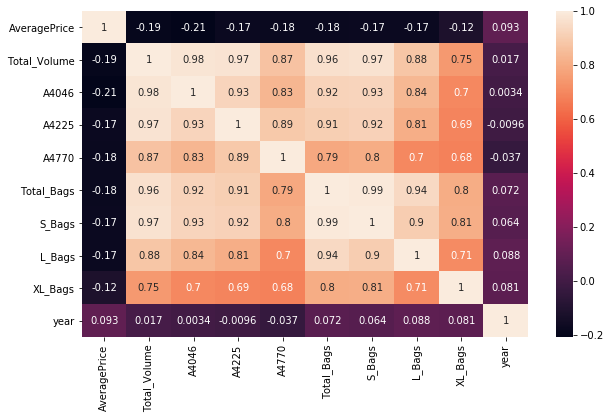

In [17]:
correlation=df_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

A4046 fe feature is highly correlated with averageprice all the features are negatively correlate with average price

In [18]:
df_mod=df_new

In [19]:
from scipy.stats import zscore
col = ['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in col:
    z = np.abs(zscore(df_new[i]))
print(np.where(z > 3))

(array([ 780,  781,  791,  799, 2340, 2341, 2652, 2653, 2655, 2659, 2663,
       2666, 2667, 2671, 3610, 3611, 3612, 3613, 3614, 3615, 3617, 3620,
       3621, 3624, 3630, 3634, 3636, 3639, 4131, 4132, 4133, 4339, 4340,
       4341, 5173, 5174, 5176, 5177, 5194, 5195, 5196, 5222, 5223, 5224,
       5225, 5227, 5228, 5229, 5460, 5461, 5462, 5463, 5468, 5469, 5470,
       5471, 5472, 5473, 5474, 5476, 5477, 5478, 5479, 5480, 5481, 5482,
       5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493,
       5494, 5495, 5496, 5497, 5498, 5499, 5500, 5502, 5503, 5505, 5506,
       5507, 5508, 5509, 5511, 5934, 5935, 5936, 5937, 5939, 5940, 5941,
       5955, 5957, 5959, 5960, 5961, 5962, 5963, 5965, 5966, 5967, 5968,
       5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 6430, 6431, 6432,
       6434, 6435, 6436, 6437, 6439, 6445, 6448, 6455, 6816, 6817, 6818,
       6819, 7178, 8072, 8074, 8075, 8077, 8078, 8079, 8080, 8081, 8082,
       8083, 8319, 8320, 8321, 8322, 8323, 8324, 8

In [20]:
df_mod = df_new[(z<3)]

In [21]:
df_mod.shape

(18015, 13)

In [22]:
round((((18249-18015)/18249)*100),2)

1.28

the data loss is 1.28%

In [23]:
Q1=df_new.quantile(0.25)
Q3=df_new.quantile(0.75)
IQR=Q3-Q1
data_clean1=df_new[~((df_new<(Q1-1.5*IQR))| (df_new>(Q1+1.5*IQR))).any(axis=1)]

In [24]:
data_clean1.shape

(8881, 13)

data loss so I'm not using IQR

In [25]:
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    print(cols[i],"=",df_mod[cols[i]].skew())

AveragePrice = 0.5677670765747412
Total_Volume = 11.10938791811914
A4046 = 11.180590783409828
A4225 = 11.700613162642632
A4770 = 11.079595758815728
Total_Bags = 8.13892584681044
S_Bags = 8.418200553236469
L_Bags = 8.157017110271338
XL_Bags = 5.71266877721623


In [26]:
data_clean=df_mod

In [27]:
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    data_clean[cols[i]]=np.cbrt(data_clean[cols[i]])
    data_clean[cols[i]]=np.cbrt(data_clean[cols[i]])

In [28]:
data_clean=df_mod
cols=['AveragePrice','Total_Volume','A4046','A4225','A4770','Total_Bags','S_Bags','L_Bags','XL_Bags']
for i in range(0,9):
    print(cols[i],"=",data_clean[cols[i]].skew())

AveragePrice = -0.11301367867399699
Total_Volume = 0.4721202740987655
A4046 = 0.18926046681286
A4225 = 0.11785439821050733
A4770 = -0.058208304550016
Total_Bags = 0.2716319941330245
S_Bags = -0.1588920735173199
L_Bags = -0.5869481820794423
XL_Bags = 1.008520752107509


Skewness is removed

In [29]:
data_clean.isnull().sum()

Date            0
AveragePrice    0
Total_Volume    0
A4046           0
A4225           0
A4770           0
Total_Bags      0
S_Bags          0
L_Bags          0
XL_Bags         0
type            0
year            0
region          0
dtype: int64

FEATURE ENGINEERING

Encoding all categorical coloumn into numerical column using label encoding technique

In [30]:
data_new=data_clean
col_encod=['Date','type','year','region']

In [31]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_new[col]= label.fit_transform(df_mod[col])

In [32]:
data_new.head(5)

,Date,AveragePrice,Total_Volume,A4046,A4225,A4770,Total_Bags,S_Bags,L_Bags,XL_Bags,type,year,region
0,51,1.032194,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0,0,0
1,50,1.033907,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0,0,0
2,49,0.991969,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0,0,0
3,48,1.008588,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0,0,0
4,47,1.027809,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0,0,0


In [33]:
x1=data_new.drop('AveragePrice',axis=1)
y1=data_new['AveragePrice']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

transforming un scaled data into scaled data using min max scalining technique

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
x=scaled
y=y1

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [39]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.0092527405133622
Mean squared error 0.00016898070955252063
Root Mean squared error 0.012999258038538993
R2 Score 0.8441090636850966
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.02643905372094536
Mean squared error 0.0010493707252081004
Root Mean squared error 0.03239399211594799
R2 Score 0.031916806792105734
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.009800837452274629
Mean squared error 0.00022172637616601693
Root Mean squared error 0.014890479379993679
R2 Score 0.7954492410538274
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.01715147766856406
Mean squared error 0.0004775122198566198
Root Mean squared error 0.021852052989516108
R2 Score 0.559477367

Cross Validation

In [40]:
scorel=[]
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

0.1378965596184902

In [41]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

-0.40948383792545895

In [42]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

-0.013149355981283705

In [43]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

0.236496087233483

In [44]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

0.4474338526909228

In [45]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores.mean()

0.5255920730327654

Difference of predicted model and crossvalidation score

In [46]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR KNeighbors
0.8441090636850966-0.1378965596184902

0.7062125040666064

In [47]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR SVR
0.03191680679210551-0.40948383792545895

-0.37756703113335344

In [48]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR DecisionTreeRegressor
0.8002653936660269-0.02308097454524378

0.7771844191207831

In [49]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR LinearRegression
0.5594773672546338-0.236496087233483

0.3229812800211508

In [50]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR RandomForest
0.9100445979029986-0.44774959721864827

0.46229500068435037

In [51]:
#DIFFERENCE IN PREDICTED SCORE AND CROSSVALIDATION SCORE FOR GradientBoosting
0.7781982894885009-0.525725963746555

0.2524723257419459

I have found difference of predicted model with cross validation to avoid overfitting of data. In the above process gradient boosting model has least difference .So I'm selecting gradient boosting regressor as best model because it has least difference(0.2524723257419459) and it has very less error values compare to other model model

Hyper tuning

In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {"learning_rate": [0.01, 0.1],
               "n_estimators": [10, 100,500,1000],
               "max_depth": [3, 5, 8]
              
                    }

grid = GridSearchCV(GradientBoostingRegressor(), param_grid = parameters, scoring = "r2")

In [53]:
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 1000}


In [54]:
print(grid.best_estimator_)

GradientBoostingRegressor(max_depth=8, n_estimators=1000)


In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=1000)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',acc)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',r2)

Accuracy 0.7799676097781603
Mean absolute error 0.01202657940192096
Mean squared error 0.00024606237710216174
Root Mean squared error 0.015686375524708113
r2 score 0.7799676097781603


In [56]:
from joblib import dump
dump(model, 'model_avocado.joblib')

['model_avocado.joblib']

In [57]:
from joblib import load
loaded = load('model_avocado.joblib')